In [179]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [183]:
#a02 has range 20 - 150
#a21 has range 10 - 80

In [182]:
df = pd.read_excel(r'sensor123456.xlsx')
df['voltage'] = df['Va2d'] *0.0049
df['type'] = 'a21'
a21 = [1,2,5,6]
a02 = [3,4]
for i in range(len(df)):
    if df.loc[i,'sensor'] in a02: 
        df.loc[i, 'type'] = 'a02'

In [278]:
sensor = pd.read_excel(r'median.xlsx')
sensor['type'] = 'a21'
for i in range(len(sensor)):
    if sensor.loc[i,'sensor'] in a02: 
        sensor.loc[i, 'type'] = 'a02'

In [279]:
sensor.head()

,distance,a2d,sensor,type
0,5,232,3,a02
1,10,477,3,a02
2,15,537,3,a02
3,20,511,3,a02
4,25,454,3,a02


In [281]:
sensor.sensor.unique()

array([3, 5, 4, 6, 1, 2], dtype=int64)

### Median

In [282]:
s3 = sensor[sensor.sensor == 3].iloc[3:]
s4 = sensor[sensor.sensor == 4].iloc[3:]
s1 = sensor[sensor.sensor == 1].iloc[1:-8]
s2 = sensor[sensor.sensor == 2].iloc[1:-8]
s5 = sensor[sensor.sensor == 5].iloc[1:-8]
s6 = sensor[sensor.sensor == 6].iloc[1:-8]

In [283]:
s3

,distance,a2d,sensor,type
3,20,511,3,a02
4,25,454,3,a02
5,30,378,3,a02
6,35,323,3,a02
7,40,290,3,a02
8,45,272,3,a02
9,50,254,3,a02
10,55,237,3,a02
11,60,228,3,a02
12,65,224,3,a02


In [284]:
s1

,distance,a2d,sensor,type
65,10,528,1,a21
66,15,380,1,a21
67,20,307,1,a21
68,25,259,1,a21
69,30,241,1,a21
70,35,225,1,a21
71,40,205,1,a21


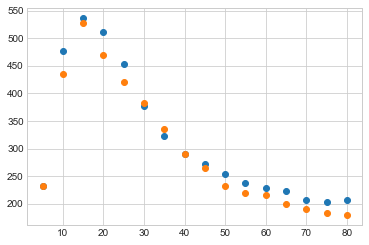

In [221]:
#long range
x = sensor[sensor.sensor == 3]['distance ']
y3 = sensor[sensor.sensor == 3]['a2d']
plt.plot(x, y3, 'o')

y4 = sensor[sensor.sensor == 4]['a2d']
plt.plot(x, y4, 'o')

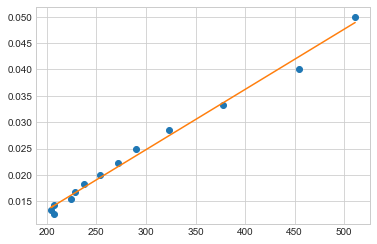

In [252]:
k = 0
inverse = 1/(s3[s3.sensor == 3]['distance '] + k)
y = s3[s3.sensor == 3]['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [240]:
print("m: ", m, "\t q: ", q)

m:  0.00011434038760218756 	 q:  -0.009519738203504342


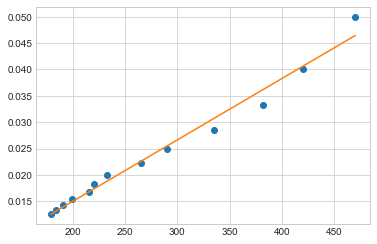

In [253]:
k = 0
inverse = 1/(s4['distance '] + k)
y = s4['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [254]:
print("m: ", m, "\t q: ", q)

m:  0.00011647455531378822 	 q:  -0.00830505186657575


### Short Range Sensor

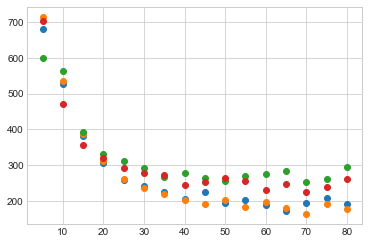

In [290]:
#short range
x = sensor[sensor.sensor == 1]['distance ']

#blue
y1 = sensor[sensor.sensor == 1]['a2d']
plt.plot(x, y1, 'o')

#2 actually quite accurate orange
y2 = sensor[sensor.sensor == 2]['a2d']
plt.plot(x, y2, 'o')

#green
y5 = sensor[sensor.sensor == 5]['a2d']
plt.plot(x, y5, 'o')

#red
y6 = sensor[sensor.sensor == 6]['a2d']
plt.plot(x, y6, 'o')

In [322]:
#overall short
s1256 = sensor[(sensor.type == 'a21')&(sensor['distance '] >= 10)]

In [323]:
#overall short
s1256.groupby(['distance '])['a2d'].mean().values

array([523.75, 379.  , 317.25, 280.75, 262.25, 245.25, 232.75, 233.5 ,
       229.25, 227.5 , 222.25, 220.25, 208.5 , 224.5 , 230.5 ])

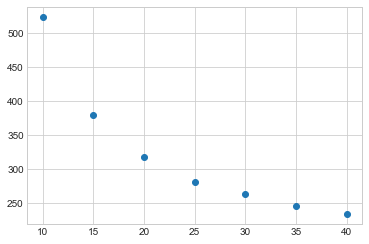

In [330]:
#overall short
x = s1256['distance '].unique()

#blue
y1256 =  s1256.groupby(['distance '])['a2d'].mean().values
plt.plot(x, y1256, 'o')

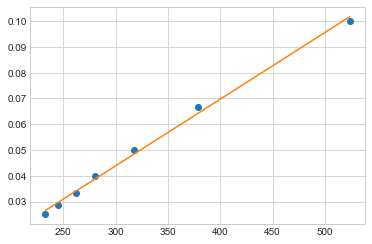

In [328]:
#overall short
s1256 = sensor[(sensor.type == 'a21')&(sensor['distance '] >= 10)&(sensor['distance '] <= 40)]
k = 0
inverse = 1/(s1256['distance '].unique() + k)
y = s1256.groupby(['distance '])['a2d'].mean().values
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [329]:
#overall short
print("m: ", m, "\t q: ", q)

m:  0.0002585644343682335 	 q:  -0.033695924121111845


In [331]:
#overall long
s34 = sensor[(sensor.type == 'a02')&(sensor['distance '] >= 20)]
s34.groupby(['distance '])['a2d'].mean().values

array([490.5, 437. , 380. , 329. , 290. , 268.5, 243.5, 228.5, 222. ,
       211.5, 199. , 194. , 193. ])

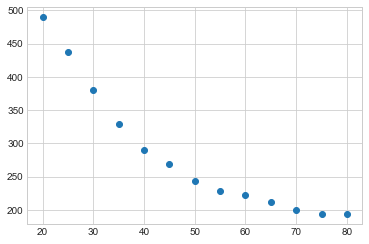

In [332]:
#overall long
x = s34['distance '].unique()

y34 =  s34.groupby(['distance '])['a2d'].mean().values
plt.plot(x, y34, 'o')

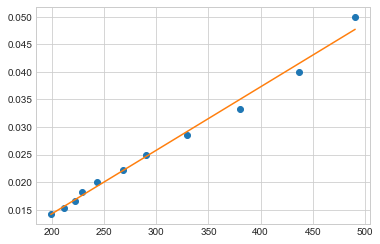

In [335]:
#overall long
s34 = sensor[(sensor.type == 'a02')&(sensor['distance '] >= 20)&(sensor['distance '] <= 70)]
k = 0
inverse = 1/(s34['distance '].unique() + k)
y = s34.groupby(['distance '])['a2d'].mean().values
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [336]:
#overall long
print("m: ", m, "\t q: ", q)

m:  0.00011510540548740905 	 q:  -0.008740407887264308


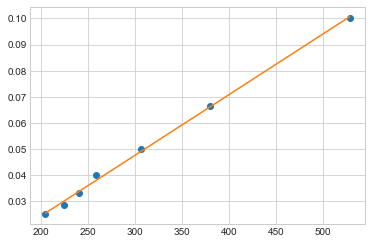

In [293]:
#individual
k = 0
inverse = 1/(s1['distance '] + k)
y = s1['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [294]:
#individual
print("m: ", m, "\t q: ", q)

m:  0.0002328262427036455 	 q:  -0.022262980289698742


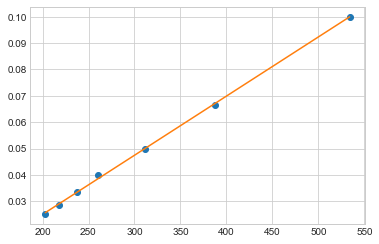

In [295]:
#individual
k = 0
inverse = 1/(s2['distance '] + k)
y = s2['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [296]:
#individual
print("m: ", m, "\t q: ", q)

m:  0.00022448273459062005 	 q:  -0.01989870479042789


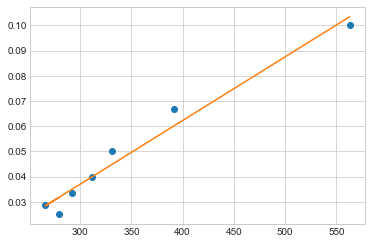

In [297]:
#individual
k = 0
inverse = 1/(s5['distance '] + k)
y = s5['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [298]:
#individual
print("m: ", m, "\t q: ", q)

m:  0.0002525817148471221 	 q:  -0.03878072101161622


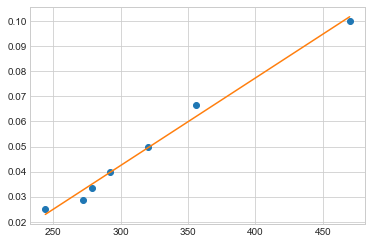

In [299]:
#individual
k = 0
inverse = 1/(s6['distance '] + k)
y = s6['a2d']
plt.plot(y , inverse, 'o')

m, q = np.polyfit(y, inverse, 1)
plt.plot(y, m*y + q)

In [300]:
#individual
print("m: ", m, "\t q: ", q)

m:  0.0003490847611835547 	 q:  -0.06227640616449279


## Get the calculated range formula

In [187]:
df.head()

,No,distance,Va2d,sensor,voltage,R,Diff,type,calc_range
0,1,10,543,1,2.6607,11.086877,-1.086877,a21,10.523546
1,2,10,514,1,2.5186,12.081568,-2.081568,a21,11.117287
2,3,10,538,1,2.6362,11.248907,-1.248907,a21,10.621349
3,4,10,538,1,2.6362,11.248907,-1.248907,a21,10.621349
4,5,10,541,1,2.6509,11.151245,-1.151245,a21,10.562450


In [115]:
x = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]

a02_mean = df[df.type == 'a02'].groupby(['type','distance '])['reading'].mean().values
a21_mean = df[df.type == 'a21'].groupby(['type','distance '])['reading'].mean().values

#quantiles

a02_q25 = df[df.type == 'a02'].groupby(['type','distance '])['reading'].quantile(.25).values
a21_q25 = df[df.type == 'a21'].groupby(['type','distance '])['reading'].quantile(.25).values

a02_q50 =df[df.type == 'a02'].groupby(['type','distance '])['reading'].quantile(.50).values
a21_q50 =df[df.type == 'a21'].groupby(['type','distance '])['reading'].quantile(.50).values

In [168]:
x = a02_mean
y = inverse
m, q = np.polyfit(x, y, 1)

plt.plot(x, y, 'o')
plt.plot(x, m*x + q)

print(m, q)

In [173]:
print(m)

0.00016143987684773324


In [174]:
print(q)

-0.016678975257107514


In [176]:
1/m

6194.256459593185

In [178]:
q/m

-103.31385022573313

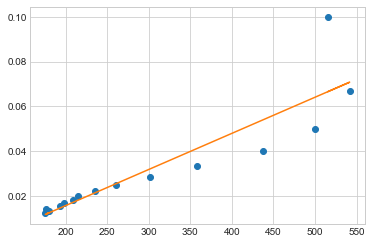

In [172]:
plt.plot(x, y, 'o')
plt.plot(x, m*x + q)

In [185]:
df['calc_range'] = (1/df['voltage'])*28 

###### df.head(50)

In [203]:
df[df.type == 'a02'].groupby(['type','distance '])[['distance ', 'R','Diff']].mean()

distance            R       Diff
type distance                                   
a02  10                10   12.612614  -2.612614
     15                15   11.235308   3.764692
     20                20   12.683576   7.316424
     25                25   15.633475   9.366525
     30                30   22.041595   7.958405
     35                35   30.202108   4.797892
     40                40   41.531695  -1.531695
     45                45   50.021100  -5.021100
     50                50   59.906982  -9.906982
     55                55   64.813676  -9.813676
     60                60   71.155282 -11.155282
     65                65   53.924075  11.075925
     70                70  115.713808 -45.713808
     75                75   93.129440 -18.129440
     80                80  104.914180 -24.914180

In [204]:
df[df.type == 'a21'].groupby(['type','distance '])[['distance ', 'R','Diff']].mean()

distance           R       Diff
type distance                                  
a21  10                10  11.468000  -1.468000
     15                15  19.454011  -4.454011
     20                20  26.843399  -6.843399
     25                25  33.022792  -8.022792
     30                30  37.637684  -7.637684
     35                35  37.883097  -2.883097
     40                40  36.799991   3.200009
     45                45  42.732538   2.267462
     50                50  41.282411   8.717589
     55                55  40.736513  14.263487
     60                60  39.428211  20.571789
     65                65  39.641064  25.358936
     70                70  49.215007  20.784993
     75                75  41.921491  33.078509
     80                80  44.128625  35.871375

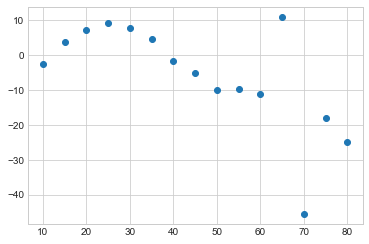

In [197]:
x = df['distance '].unique()
y = df[df.type == 'a02'].groupby(['type','distance '])['Diff'].mean().values
plt.plot(x, y, 'o')

In [119]:
df.groupby(['type','distance '])['calc_range'].describe()

count       mean       std        min        25%        50%  \
type distance                                                                 
a02  10          40.0  11.135053  0.183758  10.957167  10.985222  11.006961   
     15          40.0  11.060040  0.075912  10.960384  11.002506  11.013171   
     20          40.0  11.146083  0.060211  11.082251  11.104744  11.114984   
     25          40.0  11.310141  0.075284  11.221001  11.257962  11.267026   
     30          38.0  11.617977  0.211514  11.393728  11.439367  11.525093   
     35          42.0  11.943609  0.312075  11.591723  11.665973  11.812153   
     40          40.0  12.279107  0.477818  11.814059  11.867414  12.049218   
     45          40.0  12.510647  0.484570  12.026342  12.093145  12.233095   
     50          40.0  12.735058  0.488564  12.181025  12.304147  12.554264   
     55          40.0  12.826872  0.514214  11.991040  12.429035  12.753889   
     60          40.0  12.953908  0.493585  12.322880  12.492609  12.886077   
     65          40.0  13.088464  0.730125  12.140182  12.529029  13.122560   
     70          40.0  13.347551  0.664525  12.473717  12.717864  13.293783   
     75          40.0  13.259085  0.547688  12.240896  12.760524  13.055768   
     80          40.0  13.337493  0.570467  12.621232  12.871500  13.246753   
a21  10          80.0  11.074831  0.045322  10.985222  11.044183  11.065113   
     15          80.0  11.505818  0.072154  11.292825  11.461454  11.491981   
     20          80.0  11.831125  0.156657  11.618778  11.730294  11.788513   
     25          80.0  12.043766  0.307961  11.665973  11.843318  11.967198   
     30          78.0  12.196790  0.332076  11.726370  11.928910  12.116431   
     35          82.0  12.213680  0.292317  11.747488  12.042645  12.132196   
     40          80.0  12.172858  0.325410  11.680672  11.915942  12.140182   
     45          80.0  12.292896  0.486295  11.685630  11.982517  12.160418   
     50          80.0  12.291680  0.387567  11.628002  12.039001  12.219148   
     55          80.0  12.253983  0.443080  11.661130  11.937046  12.112555   
     60          80.0  12.250624  0.355412  11.705757  11.996262  12.214873   
     65          80.0  12.236193  0.401368  11.700680  12.013887  12.144205   
     70          80.0  12.427014  0.543930  11.726370  12.046302  12.240896   
     75          80.0  12.240859  0.504548  11.637331  11.884352  12.124299   
     80          80.0  12.331900  0.499175  11.600640  11.967069  12.249754   

                      75%        max  
type distance                         
a02  10         11.279917  11.552795  
     15         11.112290  11.255887  
     20         11.171561  11.319696  
     25         11.346127  11.511716  
     30         11.770654  12.164502  
     35         12.185219  12.682763  
     40         12.698611  13.505697  
     45         12.934532  13.593890  
     50         13.126850  13.968254  
     55         13.251391  13.968254  
     60         13.346602  13.940887  
     65         13.422101  15.952381  
     70         13.816695  15.102041  
     75         13.722781  14.329004  
     80         13.593890  14.801921  
a21  10         11.096792  11.255887  
     15         11.541279  11.814059  
     20         11.885903  12.452483  
     25         12.114493  13.228410  
     30         12.388424  13.341688  
     35         12.378483  13.284072  
     40         12.363725  13.039514  
     45         12.473717  13.968254  
     50         12.517454  13.887269  
     55         12.473717  13.968254  
     60         12.449931  13.265306  
     65         12.344330  13.759398  
     70         12.689121  14.464286  
     75         12.406047  14.499438  
     80         12.618323  14.201681